# 1. Importin Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# 2. Setting Up kaggle Import

In [2]:
!pip install kaggle

## 2. Importing Kaggle DataSet

In [5]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d esfiam/balanced-chest-x-ray-dataset

Dataset URL: https://www.kaggle.com/datasets/esfiam/balanced-chest-x-ray-dataset
License(s): MIT
 99% 1.52G/1.53G [00:19<00:00, 60.4MB/s]
100% 1.53G/1.53G [00:19<00:00, 83.2MB/s]


In [7]:
!unzip balanced-chest-x-ray-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/NoFinding/00022117_000.png  
  inflating: train/NoFinding/00022120_000.png  
  inflating: train/NoFinding/00022122_000.png  
  inflating: train/NoFinding/00022124_002.png  
  inflating: train/NoFinding/00022125_001.png  
  inflating: train/NoFinding/00022125_002.png  
  inflating: train/NoFinding/00022127_000.png  
  inflating: train/NoFinding/00022128_000.png  
  inflating: train/NoFinding/00022131_000.png  
  inflating: train/NoFinding/00022132_009.png  
  inflating: train/NoFinding/00022132_010.png  
  inflating: train/NoFinding/00022133_003.png  
  inflating: train/NoFinding/00022134_001.png  
  inflating: train/NoFinding/00022135_000.png  
  inflating: train/NoFinding/00022135_005.png  
  inflating: train/NoFinding/00022135_008.png  
  inflating: train/NoFinding/00022136_002.png  
  inflating: train/NoFinding/00022139_000.png  
  inflating: train/NoFinding/00022140_000.png  
  inflating: train/NoFinding/00022141

# 3. Importing Data

In [8]:
train_dir = '/content/train'
test_dir = '/content/test'

Not Doing Any Data Augmentation.. because not necessary. Already we have quite large dataset and balanced

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)
val_data = val_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 49540 images belonging to 2 classes.
Found 12386 images belonging to 2 classes.


# 4. Visualizing Data

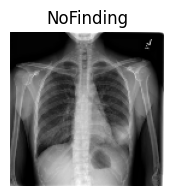

In [26]:
images, labels = next(train_data)
class_names = {v: k for k, v in train_data.class_indices.items()}

plt.figure(figsize=(2, 2))
plt.imshow(images[1])
label_index = np.argmax(labels[1])
label_name = class_names[1]
plt.title(f"{label_name}")
plt.axis('off')

plt.show()

In [27]:
np.max(images)

1.0

# 5. CNN MODEL BUILDING

## 5.1 Importing Pre Trained Model 'Efficient Net B0'

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

# Classification layer for binary classification
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)
# we can change the last layer according to our case scenerio...and can also add more dense layers

In [31]:
model = Model(inputs=base_model.input, outputs=x)

In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## 5.2 Training Of Pretrained Model

In [34]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

 Model was not working at all so we skipped this part for this case.. Going towards Fine Tunning

## 5. Fine-Tunning Model

## 5.1 Training Few Layers Of Pre Trained Model

In [40]:
base_model.trainable = True
for layer in base_model.layers[:150]:
    layer.trainable = False

In [39]:
len(base_model.layers)

238

In [41]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_4 (Rescaling)   │ (None, 128, 128, 3)    │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_2           │ (None, 128, 128, 3)    │              7 │ rescaling_4[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_5 (Rescaling)   │ (None, 128, 128, 3)    │              0 │ normalization_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 129, 129, 3)    │              0 │ rescaling_5[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 64, 64, 32)     │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 64, 64, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 64, 64, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 64, 64, 32)     │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 64, 64, 32)     │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 64, 64, 32)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 4,213,668 (16.07 MB)

 Trainable params: 4,004,445 (15.28 MB)

 Non-trainable params: 209,223 (817.28 KB)

## 5.2 Visualize Our Fine Tuned Model

In [38]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Output hidden; open in https://colab.research.google.com to view.

## 5.3 Training Of Fine Tunned Model

In [42]:
history_fine = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

Epoch 1/10
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 191s 98ms/step - accuracy: 0.5193 - loss: 0.7143 - val_accuracy: 0.5011 - val_loss: 0.7080
Epoch 2/10
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 161s 83ms/step - accuracy: 0.5406 - loss: 0.6869 - val_accuracy: 0.5010 - val_loss: 0.7485
Epoch 3/10
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 126s 81ms/step - accuracy: 0.5481 - loss: 0.6834 - val_accuracy: 0.5840 - val_loss: 0.6750
Epoch 4/10
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 128s 83ms/step - accuracy: 0.5542 - loss: 0.6821 - val_accuracy: 0.5010 - val_loss: 0.7436
Epoch 5/10
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 144s 84ms/step - accuracy: 0.5524 - loss: 0.6821 - val_accuracy: 0.4988 - val_loss: 0.7165
Epoch 6/10
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 126s 81ms/step - accuracy: 0.5535 - loss: 0.6827 - val_accuracy: 0.5010 - val_loss: 0.7427
Epoch 7/10
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 127s 82ms/step - accuracy: 0.5609 - loss: 0.6799 - val_accuracy: 0.5891 - val_loss: 0.6699
Epoch 8/10
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 148s 96ms/step - accuracy: 

In [43]:
history_fine = model.fit(
    train_data,
    epochs=20,
    initial_epoch = 10,
    validation_data=val_data
)

Epoch 11/20
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 127s 82ms/step - accuracy: 0.5698 - loss: 0.6758 - val_accuracy: 0.5717 - val_loss: 0.6766
Epoch 12/20
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 129s 83ms/step - accuracy: 0.5727 - loss: 0.6755 - val_accuracy: 0.6000 - val_loss: 0.6654
Epoch 13/20
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 130s 84ms/step - accuracy: 0.5760 - loss: 0.6722 - val_accuracy: 0.5304 - val_loss: 0.7032
Epoch 14/20
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 129s 83ms/step - accuracy: 0.5740 - loss: 0.6727 - val_accuracy: 0.6035 - val_loss: 0.6654
Epoch 15/20
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 141s 83ms/step - accuracy: 0.5782 - loss: 0.6727 - val_accuracy: 0.5354 - val_loss: 0.6887
Epoch 16/20
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 128s 83ms/step - accuracy: 0.5779 - loss: 0.6724 - val_accuracy: 0.5348 - val_loss: 0.7011
Epoch 17/20
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 142s 83ms/step - accuracy: 0.5853 - loss: 0.6680 - val_accuracy: 0.5308 - val_loss: 0.7093
Epoch 18/20
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 133s 86ms/step - ac

Because Of the model complexity and noise in data our model is taking alot of time to increase accuracy. It would take approximately 40 more epochs to reah an accuracy if 80% and still our model gives us a very low loss on both training and validation